## Diabetes Data analysis

## Importing Required Libraries

In [2]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

Joining all the Datasets in the directory `Diabetes-Data` to a DataFrame called merge_csv

In [31]:
directory = '/content/Diabetes-Data'
merge_csv = pd.DataFrame(pd.read_csv("/content/Diabetes-Data/data-01"))
merge_csv.columns= ["Date"]
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f) and f != "/content/Diabetes-Data/data-01":
        m2 = pd.read_csv(f,on_bad_lines="warn")
        m2.columns=["Date"]
        merge_csv = pd.concat([merge_csv,m2],axis=0)

In [32]:
merge_csv

,Date
0,04-21-1991\t9:09\t33\t009
1,04-21-1991\t9:09\t34\t013
2,04-21-1991\t17:08\t62\t119
3,04-21-1991\t17:08\t33\t007
4,04-21-1991\t22:51\t48\t123
...,...
294,05-29-1991\t22:14\t34\t7
295,05-30-1991\t07:10\t58\t171
296,05-30-1991\t07:15\t33\t7
297,05-30-1991\t11:34\t60\t90


Spliting the `merge_csv DataFrame` into three columns which are seperated by `\t`  

In [33]:
merge_csv = merge_csv["Date"].str.split("\t",n=3,expand=True)

Giving names to those columns `["Date","Time","Code","Value"]`

In [34]:
merge_csv.columns = ["Date","Time","Code","Value"]

`Converting the DataFrame to a csv` File called `merge.csv`

In [35]:
merge_csv.to_csv("merge.csv")


After which we notice that there are two types of methods the reading was taken `Electronic method ` and `Paper method`. So, seperating the `merge.csv` into `electronic_record` and `paper_record` as seperate csv

In [37]:
csv = pd.read_csv("merge.csv")
csv = csv.drop("Unnamed: 0",axis=1)
paper_record = csv[csv["Date"].isna()]
paper_record.to_csv("paper_record.csv",index=False)
electronic_record = csv.dropna()
electronic_record.to_csv("ele_rec.csv",index=False)


Loading the `ele_rec.csv` into a DataFrame `dataset`  

In [38]:
dataset = pd.read_csv("ele_rec.csv")
dataset

,Date,Time,Code,Value
0,04-21-1991,9:09,33,009
1,04-21-1991,9:09,34,013
2,04-21-1991,17:08,62,119
3,04-21-1991,17:08,33,007
4,04-21-1991,22:51,48,123
...,...,...,...,...
29189,05-29-1991,22:14,34,7
29190,05-30-1991,07:10,58,171
29191,05-30-1991,07:15,33,7
29192,05-30-1991,11:34,60,90


The column `dataset["Value"]` contains some string values to remove those values and to convert it `to numeric ` and we store the DataFrame to 
a variable `clean_dataset`

In [39]:

clean_dataset = dataset[(dataset["Value"]!="0Hi" )* (dataset["Value"]!="0Lo" ) * (dataset["Value"]!="0''" )]
clean_dataset["Value"] = pd.to_numeric(clean_dataset["Value"])
clean_dataset["Code"] = pd.to_numeric(clean_dataset["Code"])
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29186 entries, 0 to 29193
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    29186 non-null  object 
 1   Time    29186 non-null  object 
 2   Code    29186 non-null  int64  
 3   Value   29186 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The shape or struture of clean dataFrame is changed using pivot_table by giving by the cummulative_count of code `(clean_dataset.groupby("Code").cumcount())` and the columns by `columns="Code"` and give only the values of the `feature "Value"`

In [12]:
new_df = clean_dataset.pivot_table(index = clean_dataset.groupby("Code").cumcount(),columns="Code",values="Value")
new_df

Code,4,33,34,35,36,48,56,57,58,59,...,63,64,65,66,67,68,69,70,71,72
0,0.0,9.0,13.0,3.0,5.0,123.0,472.0,188.0,216.0,168.0,...,297.0,348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,7.0,13.0,10.0,NaN,340.0,133.0,190.0,257.0,87.0,...,413.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,10.0,13.0,10.0,NaN,288.0,126.0,44.0,239.0,162.0,...,298.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,2.0,14.0,10.0,NaN,200.0,54.0,53.0,67.0,242.0,...,37.0,352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,7.0,14.0,10.0,NaN,81.0,225.0,30.0,77.0,242.0,...,379.0,295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9472,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9473,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9474,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After which we could see there are other code values in the DataFrame so we negulate it 

In [13]:

given = [33 ,34, 35 ,48 ,57 ,58, 59 ,60, 61 ,62,63,64,65,66,67 ,68 ,69 ,70 ,71 ,72 ] 
negulate = []
for i,j in enumerate(new_df.columns) :
    if j not in given:
        negulate.append(i)
print(negulate)
new_df = new_df.drop(new_df.columns[negulate],axis=1)

[0, 4, 6]


In [14]:
new_df.head()

Code,33,34,35,48,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
0,9.0,13.0,3.0,123.0,188.0,216.0,168.0,192.0,282.0,119.0,297.0,348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,13.0,10.0,340.0,190.0,257.0,87.0,88.0,25.0,211.0,413.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,13.0,10.0,288.0,44.0,239.0,162.0,60.0,228.0,129.0,298.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,14.0,10.0,200.0,53.0,67.0,242.0,81.0,414.0,129.0,37.0,352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,14.0,10.0,81.0,30.0,77.0,242.0,162.0,448.0,206.0,379.0,295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
new_df.columns = ["Regular insulin dose(33)","NPH insulin dose(34)","UltraLente insulin dose(35)",
                 "Unspecified blood glucose measurement(48)"," Unspecified blood glucose measurement(57)","Pre-breakfast blood glucose measurement(58)",
                 "Post-breakfast blood glucose measurement(59)","Pre-lunch blood glucose measurement(60)","Post-lunch blood glucose measurement(61)",
                 "Pre-supper blood glucose measurement(62)","Post-supper blood glucose measurement(63)","Pre-snack blood glucose measurement(64)",
                 "Hypoglycemic symptoms(65)","Typical meal ingestion(66)","More-than-usual meal ingestion(67)",
                 "Less-than-usual meal ingestion(68)","Typical exercise activity(69)","More-than-usual exercise activity(70)","Less-than-usual exercise activity(71)","Unspecified special event(72)"
                ]

In [16]:
new_df

,Regular insulin dose(33),NPH insulin dose(34),UltraLente insulin dose(35),Unspecified blood glucose measurement(48),Unspecified blood glucose measurement(57),Pre-breakfast blood glucose measurement(58),Post-breakfast blood glucose measurement(59),Pre-lunch blood glucose measurement(60),Post-lunch blood glucose measurement(61),Pre-supper blood glucose measurement(62),Post-supper blood glucose measurement(63),Pre-snack blood glucose measurement(64),Hypoglycemic symptoms(65),Typical meal ingestion(66),More-than-usual meal ingestion(67),Less-than-usual meal ingestion(68),Typical exercise activity(69),More-than-usual exercise activity(70),Less-than-usual exercise activity(71),Unspecified special event(72)
0,9.0,13.0,3.0,123.0,188.0,216.0,168.0,192.0,282.0,119.0,297.0,348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.0,13.0,10.0,340.0,190.0,257.0,87.0,88.0,25.0,211.0,413.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.0,13.0,10.0,288.0,44.0,239.0,162.0,60.0,228.0,129.0,298.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,14.0,10.0,200.0,53.0,67.0,242.0,81.0,414.0,129.0,37.0,352.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,14.0,10.0,81.0,30.0,77.0,242.0,162.0,448.0,206.0,379.0,295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9471,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9472,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9473,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9474,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the `Mean` of the DataFrame 

In [17]:
new_df.mean()

Regular insulin dose(33)                          6.615238
NPH insulin dose(34)                             15.393698
UltraLente insulin dose(35)                      15.862167
Unspecified blood glucose measurement(48)       171.104255
 Unspecified blood glucose measurement(57)      160.378049
Pre-breakfast blood glucose measurement(58)     170.497135
Post-breakfast blood glucose measurement(59)    176.210526
Pre-lunch blood glucose measurement(60)         143.596529
Post-lunch blood glucose measurement(61)        244.515152
Pre-supper blood glucose measurement(62)        156.366550
Post-supper blood glucose measurement(63)       186.460829
Pre-snack blood glucose measurement(64)         148.772124
Hypoglycemic symptoms(65)                         0.000000
Typical meal ingestion(66)                        0.000000
More-than-usual meal ingestion(67)                0.000000
Less-than-usual meal ingestion(68)                0.000000
Typical exercise activity(69)                     0.0000

Finding the `Median` of the DataFrame

In [18]:
new_df.median()

Regular insulin dose(33)                          6.0
NPH insulin dose(34)                             15.0
UltraLente insulin dose(35)                      15.0
Unspecified blood glucose measurement(48)       160.0
 Unspecified blood glucose measurement(57)      142.5
Pre-breakfast blood glucose measurement(58)     161.0
Post-breakfast blood glucose measurement(59)    187.0
Pre-lunch blood glucose measurement(60)         134.0
Post-lunch blood glucose measurement(61)        225.0
Pre-supper blood glucose measurement(62)        147.0
Post-supper blood glucose measurement(63)       183.0
Pre-snack blood glucose measurement(64)         125.0
Hypoglycemic symptoms(65)                         0.0
Typical meal ingestion(66)                        0.0
More-than-usual meal ingestion(67)                0.0
Less-than-usual meal ingestion(68)                0.0
Typical exercise activity(69)                     0.0
More-than-usual exercise activity(70)             0.0
Less-than-usual exercise act

# Visualizing the Data Distribution of Each Feature in a Histogram

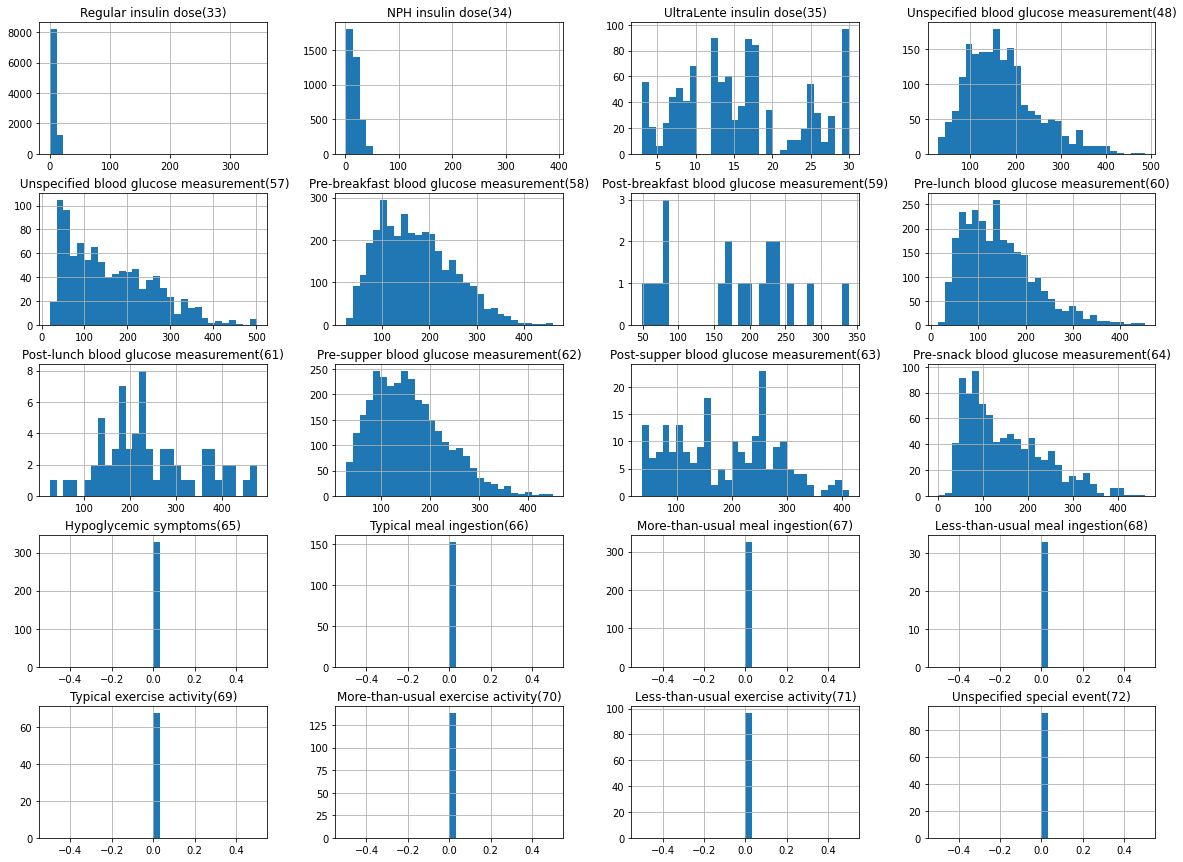

In [19]:

    
new_df.hist(bins=30,figsize=(20,15))

plt.show()

# Visualizing the IQR of each features

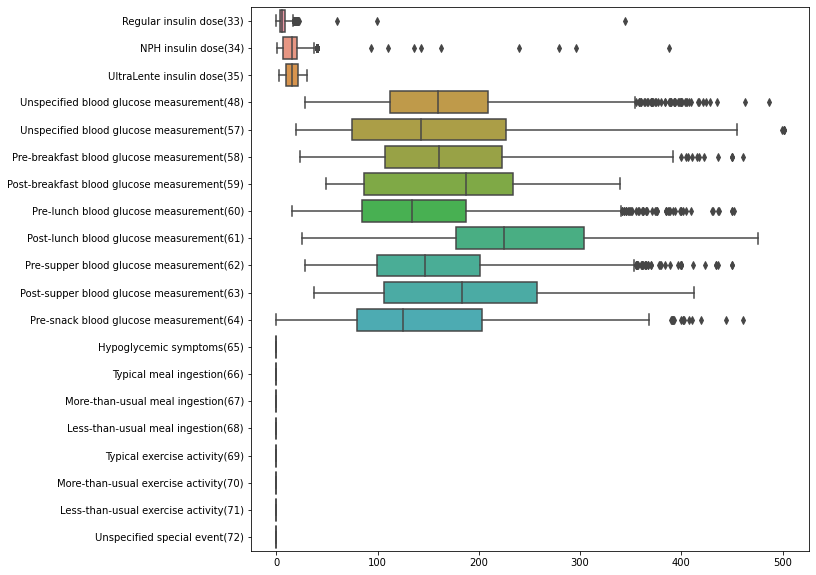

In [20]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
sns.boxplot(data=new_df,orient="h",ax=ax)


## Showing the Correlation Bettween each features

In [21]:
new_df.corr()


,Regular insulin dose(33),NPH insulin dose(34),UltraLente insulin dose(35),Unspecified blood glucose measurement(48),Unspecified blood glucose measurement(57),Pre-breakfast blood glucose measurement(58),Post-breakfast blood glucose measurement(59),Pre-lunch blood glucose measurement(60),Post-lunch blood glucose measurement(61),Pre-supper blood glucose measurement(62),Post-supper blood glucose measurement(63),Pre-snack blood glucose measurement(64),Hypoglycemic symptoms(65),Typical meal ingestion(66),More-than-usual meal ingestion(67),Less-than-usual meal ingestion(68),Typical exercise activity(69),More-than-usual exercise activity(70),Less-than-usual exercise activity(71),Unspecified special event(72)
Regular insulin dose(33),1.000000,0.000628,-0.260274,0.175226,0.045358,-0.062560,-0.179246,-0.028423,0.007865,0.028350,0.030348,-0.049174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPH insulin dose(34),0.000628,1.000000,0.139557,0.021789,0.106950,0.034226,-0.366304,0.043929,-0.051365,-0.009252,0.126016,0.006014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UltraLente insulin dose(35),-0.260274,0.139557,1.000000,-0.114273,-0.055206,0.017750,-0.228138,-0.053964,0.092288,0.040170,-0.080675,0.040857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unspecified blood glucose measurement(48),0.175226,0.021789,-0.114273,1.000000,0.043394,-0.086947,0.038018,-0.019456,-0.243427,-0.021439,-0.015288,-0.032593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unspecified blood glucose measurement(57),0.045358,0.106950,-0.055206,0.043394,1.000000,-0.028093,-0.289074,-0.048233,0.061475,-0.025626,0.034144,0.014390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-breakfast blood glucose measurement(58),-0.062560,0.034226,0.017750,-0.086947,-0.028093,1.000000,-0.146262,0.041450,-0.157153,-0.055379,0.036718,0.001854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post-breakfast blood glucose measurement(59),-0.179246,-0.366304,-0.228138,0.038018,-0.289074,-0.146262,1.000000,0.316429,0.138790,-0.034491,-0.168266,0.255928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-lunch blood glucose measurement(60),-0.028423,0.043929,-0.053964,-0.019456,-0.048233,0.041450,0.316429,1.000000,-0.007354,0.032399,0.049755,0.045562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Post-lunch blood glucose measurement(61),0.007865,-0.051365,0.092288,-0.243427,0.061475,-0.157153,0.138790,-0.007354,1.000000,-0.082406,-0.014229,-0.079192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pre-supper blood glucose measurement(62),0.028350,-0.009252,0.040170,-0.021439,-0.025626,-0.055379,-0.034491,0.032399,-0.082406,1.000000,-0.015910,-0.042158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Selecting two Features Which are Corelated and ploting them

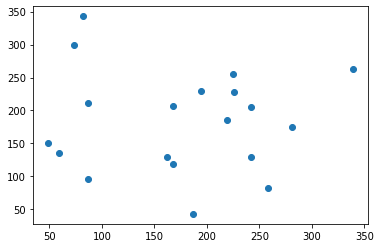

In [22]:
plt.scatter(new_df["Post-breakfast blood glucose measurement(59)"],new_df["Pre-supper blood glucose measurement(62)"])
plt.show()

The selected features consist of na values which are droped

In [23]:

selected_Data = pd.concat((new_df["Post-breakfast blood glucose measurement(59)"],new_df["Pre-supper blood glucose measurement(62)"]),axis=1).dropna()
selected_Data

,Post-breakfast blood glucose measurement(59),Pre-supper blood glucose measurement(62)
0,168.0,119.0
1,87.0,211.0
2,162.0,129.0
3,242.0,129.0
4,242.0,206.0
5,226.0,228.0
6,225.0,256.0
7,87.0,96.0
8,339.0,263.0
9,219.0,185.0


## Linear Regression
Splitting The data into Train and Test

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(selected_Data[["Post-breakfast blood glucose measurement(59)"]],selected_Data["Pre-supper blood glucose measurement(62)"],test_size=0.2)

In [25]:
len(X_test),len(X_train)


(4, 15)

Fitting the regression model

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
model.predict(X_test)

array([192.38973511, 197.13141175, 198.34317356, 193.7595528 ])

plotting the regression line by knowing the `m(slope)` and `b(intercept)`

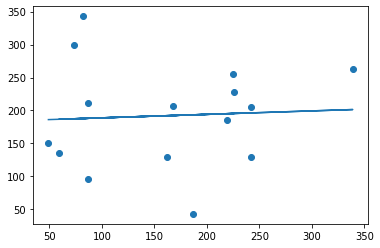

In [27]:
m = model.coef_[0]
b = model.intercept_
plt.scatter(X_train,Y_train)
plt.plot(X_train,m*X_train+b)
plt.show()

In [28]:
print(Y_test)

0     119.0
15     82.0
16    175.0
12    229.0
Name: Pre-supper blood glucose measurement(62), dtype: float64
